#Pump It Up dataset

Use the Pump It Up (https://www.kaggle.com/datasets/tatianasnwrt/pumpitup-challenge-dataset) dataset to predict faulty water pumps.

Use `X_train_raw.csv` and `y_train_raw.csv` to process the data and train and validate a model.

Test different calssification methods.

As a reference use https://colab.research.google.com/drive/10rAWC-Cnr-LlxKo0uNwAjOEx02GPxPdN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Optional for saving files



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Classification methods in skikit-learn

**Support Vector Machine**
```python
from sklearn.svm import SVC
```

**Naive Bayes (Gaussian, Multinomial)**
```python
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
```

**Stochastic Gradient Descent Classifier**
```python
from sklearn.linear_model import SGDClassifier
```

**KNN (k-nearest neighbor)**
```python
from sklearn.neighbors import KNeighborsClassifier
```

**Decision Tree**
```python
from sklearn.tree import DecisionTreeClassifier
```

**Random Forest**
```python
from sklearn.ensemble import RandomForestClassifier
```

**Gradient Boosting Classifier**
```python
from sklearn.ensemble import GradientBoostingClassifier
```

**LGBM Classifier**
```python
from lightgbm import LGBMClassifier
```

**XGBoost Classifier**
```python
from xgboost.sklearn import XGBClassifier
```

## Example how to use classification methods

Loading the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt


X_url = "/content/drive/MyDrive/X_train_raw.csv"
Y_url = "/content/drive/MyDrive/y_train_raw.csv"

X_data = pd.read_csv(X_url)
Y_data = pd.read_csv(Y_url)

print(X_data.shape)
print(Y_data.shape)

(59400, 40)
(59400, 2)


Loading the Dataset

In [ ]:





X_data.iloc[0:60, [0, 1, 2, 3, -3, -2, -1]]

Y_data.iloc[0:4, [0, 1]]

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional


Splitting into Train & Test set

In [ ]:
all_features = pd.concat((X_data.iloc[:, 1:-1], Y_data.iloc[:, 1:]))
all_features

,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,status_group
0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,0.0,Lake Nyasa,Mnyusi B,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,NaN
1,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0.0,Lake Victoria,Nyamara,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,NaN
2,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0.0,Pangani,Majengo,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,NaN
3,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0.0,Ruvuma / Southern Coast,Mahakamani,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,NaN
4,2011-07-13,Action In A,0.0,Artisan,31.130847,-1.825359,Shuleni,0.0,Lake Victoria,Kyanyamisa,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,functional
59396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,functional
59397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,functional
59398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,functional


In [ ]:
all_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118800 entries, 0 to 59399
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date_recorded          59400 non-null  object 
 1   funder                 55763 non-null  object 
 2   gps_height             59400 non-null  float64
 3   installer              55745 non-null  object 
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   wpt_name               59398 non-null  object 
 7   num_private            59400 non-null  float64
 8   basin                  59400 non-null  object 
 9   subvillage             59029 non-null  object 
 10  region                 59400 non-null  object 
 11  region_code            59400 non-null  float64
 12  district_code          59400 non-null  float64
 13  lga                    59400 non-null  object 
 14  ward                   59400 non-null  object 
 15  popula

In [ ]:
corr_data = X_data.corr(numeric_only=True)
corr_data

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
amount_tsh,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915
gps_height,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727
longitude,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732
latitude,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278
num_private,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056
region_code,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724
district_code,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315
population,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910
construction_year,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000


<Axes: >

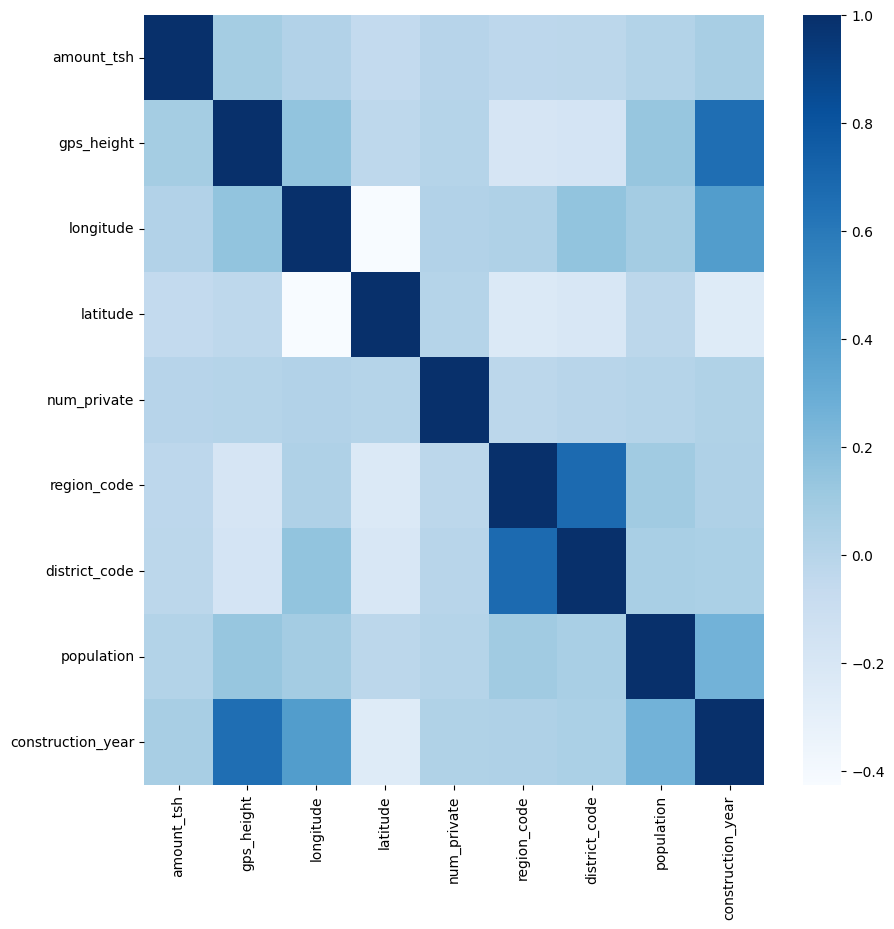

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data, cmap = 'Blues')

Training the model

In [ ]:
pd.DataFrame(X_data.corr(numeric_only=True)["gps_height"].sort_values(ascending = False))

,gps_height
gps_height,1.000000
construction_year,0.658727
longitude,0.149155
population,0.135003
amount_tsh,0.076650
num_private,0.007237
latitude,-0.035751
district_code,-0.171233
region_code,-0.183521


In [ ]:
columns_to_drop = [ "region_code", "district_code", "latitude","num_private"]
all_features.drop(columns_to_drop, axis=1, inplace=True)

all_features.shape

(118800, 34)

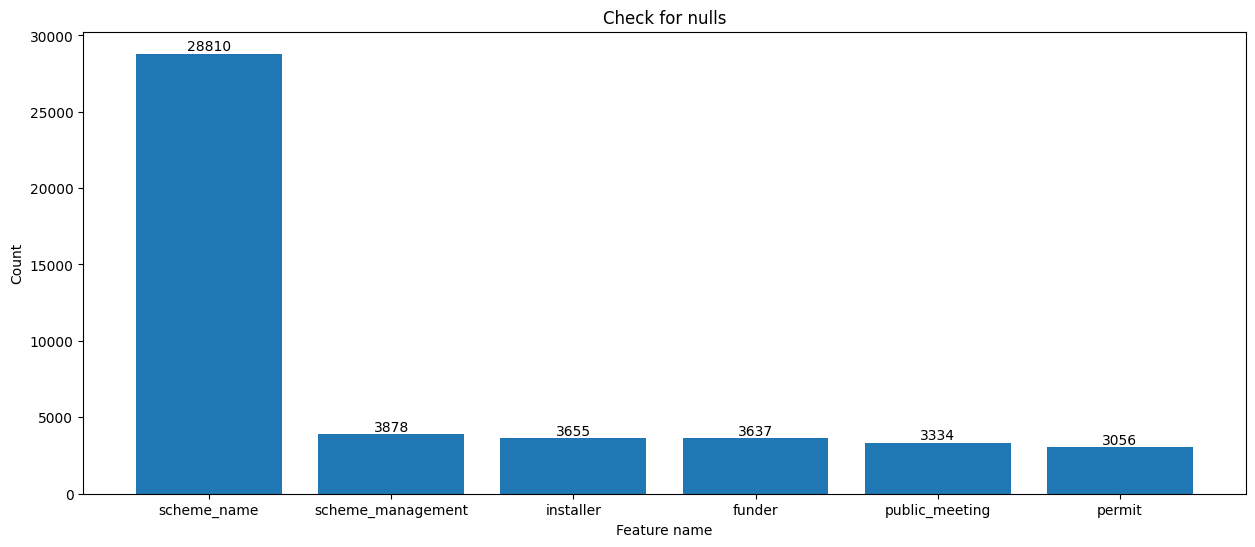

In [ ]:


na_vars = X_data.isnull().sum()[X_data.isnull().sum() > 0].sort_values(ascending = False)

plt.figure(figsize = (15,6))

bar = plt.bar(na_vars.index[:6], na_vars[:6, ])
plt.title("Check for nulls")
plt.ylabel("Count")
plt.xlabel("Feature name")
plt.bar_label(bar)
plt.show()


In [ ]:
nas = pd.DataFrame(na_vars)
nas["Percent"] = (na_vars.values / len(X_data) * 100)
nas.columns = ["Nulls", "Percent"]
nas

,Nulls,Percent
scheme_name,28810,48.501684
scheme_management,3878,6.528620
installer,3655,6.153199
funder,3637,6.122896
public_meeting,3334,5.612795
permit,3056,5.144781
subvillage,371,0.624579
wpt_name,2,0.003367


In [ ]:
for index, row in nas.iterrows():
  if row["Percent"] > 40:
    print(index)
    all_features.drop([index],inplace=True,axis=1)

all_features.shape

scheme_name


(118800, 33)

In [ ]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
numeric_features

Index(['gps_height', 'longitude', 'population', 'construction_year'], dtype='object')

In [ ]:
scaler = StandardScaler()

all_features[numeric_features] = scaler.fit_transform(all_features[numeric_features])
all_features[numeric_features]


,gps_height,longitude,population,construction_year
0,1.041252,0.131052,-0.150399,0.733857
1,1.054237,0.094610,0.212290,0.745416
2,0.025541,0.515158,0.148660,0.744365
3,-0.584751,0.671308,-0.258570,0.720196
4,-0.964200,-0.448669,-0.381587,-1.366788
...,...,...,...,...
59395,NaN,NaN,NaN,NaN
59396,NaN,NaN,NaN,NaN
59397,NaN,NaN,NaN,NaN
59398,NaN,NaN,NaN,NaN


In [ ]:

non_numeric_features = all_features.dtypes[all_features.dtypes == 'object'].index


encoder = LabelEncoder()
all_features[non_numeric_features] = all_features[non_numeric_features].apply(encoder.fit_transform)

all_features

,date_recorded,funder,gps_height,installer,longitude,wpt_name,basin,subvillage,region,lga,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,status_group
0,47,1368,1.041252,1518,0.131052,37398,1,11807,3,51,...,0,6,2,1,1,8,6,0,1,3
1,309,469,1.054237,545,0.094610,37194,4,15838,9,103,...,2,6,2,2,2,5,3,1,1,3
2,300,825,0.025541,2048,0.515158,14572,5,9074,8,108,...,5,6,2,1,1,0,1,1,2,3
3,272,1740,-0.584751,1852,0.671308,37284,7,8982,12,87,...,2,6,2,0,0,3,0,0,2,3
4,104,20,-0.964200,119,-0.448669,35528,4,7698,4,26,...,2,6,2,3,3,5,3,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,356,1896,NaN,2145,NaN,37399,9,19287,21,125,...,7,8,6,5,5,10,7,3,7,0
59396,356,1896,NaN,2145,NaN,37399,9,19287,21,125,...,7,8,6,5,5,10,7,3,7,0
59397,356,1896,NaN,2145,NaN,37399,9,19287,21,125,...,7,8,6,5,5,10,7,3,7,0
59398,356,1896,NaN,2145,NaN,37399,9,19287,21,125,...,7,8,6,5,5,10,7,3,7,0


In [ ]:
all_features = all_features.fillna(0)
all_features

,date_recorded,funder,gps_height,installer,longitude,wpt_name,basin,subvillage,region,lga,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,status_group
0,47,1368,1.041252,1518,0.131052,37398,1,11807,3,51,...,0,6,2,1,1,8,6,0,1,3
1,309,469,1.054237,545,0.094610,37194,4,15838,9,103,...,2,6,2,2,2,5,3,1,1,3
2,300,825,0.025541,2048,0.515158,14572,5,9074,8,108,...,5,6,2,1,1,0,1,1,2,3
3,272,1740,-0.584751,1852,0.671308,37284,7,8982,12,87,...,2,6,2,0,0,3,0,0,2,3
4,104,20,-0.964200,119,-0.448669,35528,4,7698,4,26,...,2,6,2,3,3,5,3,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,356,1896,0.000000,2145,0.000000,37399,9,19287,21,125,...,7,8,6,5,5,10,7,3,7,0
59396,356,1896,0.000000,2145,0.000000,37399,9,19287,21,125,...,7,8,6,5,5,10,7,3,7,0
59397,356,1896,0.000000,2145,0.000000,37399,9,19287,21,125,...,7,8,6,5,5,10,7,3,7,0
59398,356,1896,0.000000,2145,0.000000,37399,9,19287,21,125,...,7,8,6,5,5,10,7,3,7,0


In [ ]:
all_features.info()


<class 'pandas.core.frame.DataFrame'>
Index: 118800 entries, 0 to 59399
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date_recorded          118800 non-null  int64  
 1   funder                 118800 non-null  int64  
 2   gps_height             118800 non-null  float64
 3   installer              118800 non-null  int64  
 4   longitude              118800 non-null  float64
 5   wpt_name               118800 non-null  int64  
 6   basin                  118800 non-null  int64  
 7   subvillage             118800 non-null  int64  
 8   region                 118800 non-null  int64  
 9   lga                    118800 non-null  int64  
 10  ward                   118800 non-null  int64  
 11  population             118800 non-null  float64
 12  public_meeting         118800 non-null  int64  
 13  recorded_by            118800 non-null  int64  
 14  scheme_management      118800 non-null  in

Evaluating the model

In [ ]:
n_train = X_data.shape[0]

X = all_features[:n_train].values
Xtest = all_features[n_train:].values

y = X_data.gps_height.values

print("X:", X)
print(X.shape)
print("Xtest:", Xtest)
print(Xtest.shape)
print("y:", y)
print(y.shape)


X: [[ 4.70000000e+01  1.36800000e+03  1.04125207e+00 ...  0.00000000e+00
   1.00000000e+00  3.00000000e+00]
 [ 3.09000000e+02  4.69000000e+02  1.05423701e+00 ...  1.00000000e+00
   1.00000000e+00  3.00000000e+00]
 [ 3.00000000e+02  8.25000000e+02  2.55410364e-02 ...  1.00000000e+00
   2.00000000e+00  3.00000000e+00]
 ...
 [ 7.50000000e+01  1.89600000e+03 -9.64200115e-01 ...  0.00000000e+00
   4.00000000e+00  3.00000000e+00]
 [ 4.10000000e+01  8.84000000e+02 -9.64200115e-01 ...  0.00000000e+00
   4.00000000e+00  3.00000000e+00]
 [ 5.60000000e+01  1.86400000e+03 -6.88630785e-01 ...  0.00000000e+00
   4.00000000e+00  3.00000000e+00]]
(59400, 33)
Xtest: [[ 356. 1896.    0. ...    3.    7.    0.]
 [ 356. 1896.    0. ...    3.    7.    0.]
 [ 356. 1896.    0. ...    3.    7.    0.]
 ...
 [ 356. 1896.    0. ...    3.    7.    0.]
 [ 356. 1896.    0. ...    3.    7.    0.]
 [ 356. 1896.    0. ...    3.    7.    0.]]
(59400, 33)
y: [1390 1399  686 ...    0    0  191]
(59400,)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,  test_size=0.20, shuffle=True, random_state=42)

print(X_train.shape)
print(y_train.shape)

print(X_valid.shape)
print(y_valid.shape)


(47520, 33)
(47520,)
(11880, 33)
(11880,)


In [ ]:
def fit_and_score(model, X_train, y_train, X_valid, y_valid):
  model.fit(X_train, y_train)

  predict = model.predict(X_valid)
  plt.scatter(predict, y_valid, color = 'blue')
  plt.title('Faulty pumps')
  plt.xlabel('Prediction')
  plt.ylabel('Real')
  plt.show()

  rmse = sqrt(mean_squared_error(y_valid, predict))
  mape = round(mean_absolute_percentage_error(y_valid, predict) * 100, 2)
  score = r2_score(y_valid, predict)

  # printing the rmse and mape

  print('MSE: ' + str(rmse))
  print('MAPE (%): ' + str(mape))
  print("Accuracy is : {:.3f}%".format(score*100))

def cross_validate(model, X, y, cv):
  #cross validate score
  scores = cross_val_score(model, X, y, cv=cv)
  print(scores)
  print("Corss validated score is {:.2f}%".format(scores.mean()*100))


In [ ]:
model_lg = LinearRegression()

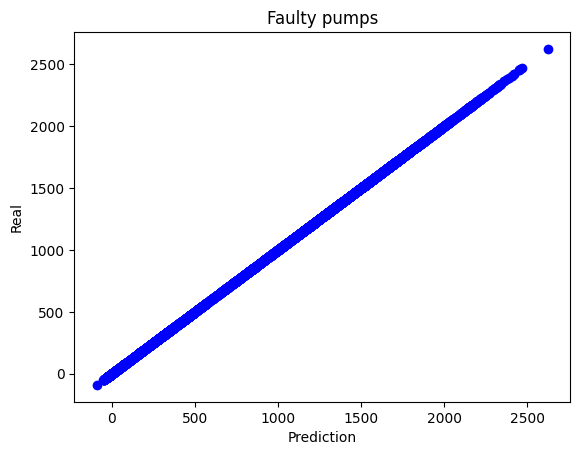

MSE: 1.3800946234420938e-09
MAPE (%): 206687185.45
Accuracy is : 100.000%


In [ ]:
fit_and_score(model_lg, X_train, y_train, X_valid, y_valid)

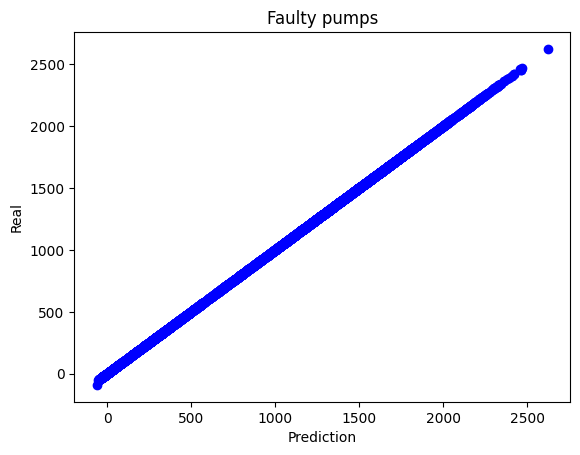

MSE: 0.35040740351801797
MAPE (%): 162196555839298.84
Accuracy is : 100.000%


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor(n_estimators=100,max_depth=10,random_state=33,)
fit_and_score(model_rfr, X_train, y_train, X_valid, y_valid)



In [ ]:
cross_validate(model_rfr, X, y, 5)

[0.99999989 0.99999489 0.99999993 0.99999972 0.99999952]
Corss validated score is 100.00%


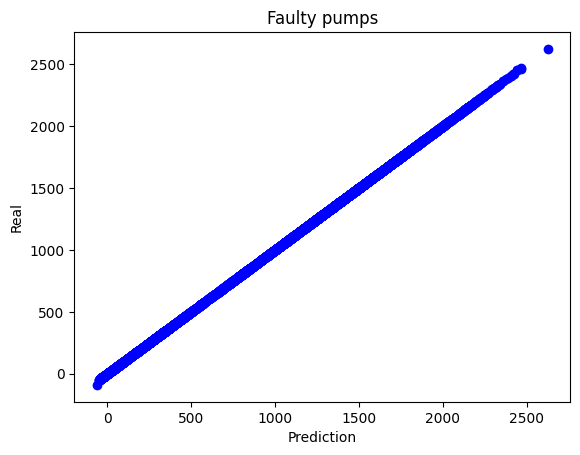

MSE: 0.3155483000600635
MAPE (%): 664331771301075.6
Accuracy is : 100.000%


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor(n_estimators=1200,max_depth=4,min_samples_split=5,learning_rate= 0.01,loss="squared_error")
fit_and_score(model_gbr, X_train, y_train, X_valid, y_valid)

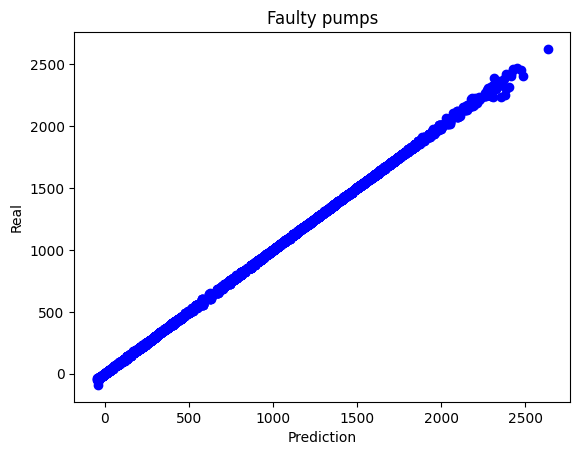

MSE: 4.669966189733801
MAPE (%): 1.342980489216e+16
Accuracy is : 99.995%


In [ ]:
model_xgboost = XGBRegressor(tree_method="hist",eval_metric=mean_absolute_error)
fit_and_score(model_xgboost, X_train, y_train, X_valid, y_valid)


In [ ]:
cross_validate(model_xgboost, X, y, 5)

[0.99995369 0.99995548 0.99994677 0.99992746 0.9999392 ]
Corss validated score is 99.99%


In [ ]:
best_model = model_gbr

preds = best_model.predict(Xtest)


X_data['gps_height'] = pd.Series(preds.reshape(1, -1)[0])
submission = pd.concat([X_data['id'], X_data['gps_height']], axis=1)
submission.to_csv('submission.csv', index=False)

In [134]:
S_url = "/content/submission.csv"
S_data = pd.read_csv(S_url)
S_data



,id,gps_height
0,69572,667.952985
1,8776,667.952985
2,34310,667.952985
3,67743,667.952985
4,19728,667.952985
...,...,...
59395,60739,667.952985
59396,27263,667.952985
59397,37057,667.952985
59398,31282,667.952985
